## Packages and definition of parameters

In [1]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors
from scipy.stats import binned_statistic_2d
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from ctapipe.instrument import SubarrayDescription

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# --- LaPalma map importing --- #
# reading map images
mapZoom  = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/map1.png')


# --- paths --- #
dir_mask = '/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/*.h5'
event_coinc_dir   = '/fefs/aswg/workspace/juan.jimenez/data/dl1/joint_runs_magic_lst'

dir_stereo_reco   = '/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_merged_Crab'
dir_stereo_reco2   = '/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_mean'

name_stereo_3T    = 'dl2_mean_Crab_total.3tel'
name_stereo_total = 'dl2_LST-1_MAGIC.Run02918_to_07282'

dl1_example_file  = '/fefs/aswg/workspace/juan.jimenez/data/dl1/stereo_subruns/Run02923/dl1_stereo_LST-1_MAGIC.Run02923.0038.h5'

# text for labeling telescopes
tel_lab = ['LST-1', 'M-I', 'M-II'] 
lst_diameter   = 23 # m
magic_diameter = 17 # m



map_xsize, map_ysize = 11.3, 6.9
map_xlims = (-244, 224)
map_ylims = (-147, 204)
xlims = (-100, 100)
ylims = (-70, 70)

kw_txt = dict(ha='center', va='center')

In [2]:
# --- reading the data --- #
df    = pd.read_hdf(os.path.join(dir_stereo_reco, f'{name_stereo_total}.h5'), key='/events/parameters')
df_3T = pd.read_hdf(os.path.join(dir_stereo_reco2, f'{name_stereo_3T   }.h5'))

###########################################
# --- telescopes positions extraction --- #
###########################################

tel_positions = SubarrayDescription.from_hdf(dl1_example_file).positions

coord_t1, coord_t2, coord_t3 = [tel_positions[tel_index].value for tel_index in [1, 2, 3]]

xpos = np.array([tel_positions[i].value[0] for i in [1, 2, 3]])
ypos = np.array([tel_positions[i].value[1] for i in [1, 2, 3]])
zpos = np.array([tel_positions[i].value[2] for i in [1, 2, 3]])

# applying a 90 degree rotation to set the north in the y direction
xpos, ypos = ypos, xpos
xpos = xpos * (-1)

coord_t1 = [xpos[0], ypos[0], zpos[0]]
coord_t2 = [xpos[1], ypos[1], zpos[1]]
coord_t3 = [xpos[2], ypos[2], zpos[2]]

print(f'\nExtracting telescopes positions:')
print(f'LST-1   coords:  [{xpos[0]:.2f}, {ypos[0]:.2f}, {zpos[0]:.2f}] m')
print(f'MAGIC-1 coords:  [{xpos[1]:.2f}, {ypos[1]:.2f}, {zpos[1]:.2f}] m')
print(f'MAGIC-2 coords:  [{xpos[2]:.2f}, {ypos[2]:.2f}, {zpos[2]:.2f}] m')

###########################################

###############################################
# --- changing the coordinates to y-north --- #
###############################################
df['core_x'], df['core_y'] = df['core_y'], df['core_x']
df['core_x'] = df['core_x'].to_numpy() * (-1)

df['pointing_zd'] = 90 - np.rad2deg(df['pointing_alt'])
df['pointing_eq_angle'] = - np.rad2deg(df['pointing_az']) + 90
df['pointing_alt'] = np.rad2deg(df['pointing_alt'])
df['pointing_az'] = np.rad2deg(df['pointing_az'])

df['zd'] = 90 - df['alt']
df['eq_angle'] = - df['az'] +90
###############################################

print(f'Stereo total dataframe:')
display(df.head(5))
print(f'3-Tel dataframe:')
display(df_3T.head(5))


Extracting telescopes positions:
LST-1   coords:  [-77.13, -8.09, 0.78] m
MAGIC-1 coords:  [62.55, 39.30, -0.97] m
MAGIC-2 coords:  [14.57, -31.21, 0.20] m
Stereo total dataframe:


,obs_id,event_id,tel_id,obs_id_magic,event_id_magic,obs_id_lst,event_id_lst,intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,slope,intercept,intensity_width_1,intensity_width_2,pixels_width_1,pixels_width_2,n_pixels,n_islands,pointing_alt,pointing_az,timestamp,time_diff,multiplicity,combo_type,alt,alt_uncert,az,az_uncert,core_x,core_y,impact,h_max,reco_energy,reco_energy_var,reco_disp,reco_disp_var,reco_alt,reco_az,disp_diff_sum,disp_diff_mean,gammaness,gammaness_var,pointing_zd,pointing_eq_angle,zd,eq_angle
0,2918,4275857,1,5093151,2058,2918.0,4275857.0,141.289196,0.111838,0.315187,0.334441,70.463810,0.030138,0.002521,0.026636,0.002883,-80.822090,-0.167787,1.944122,-204.326584,21.994013,0.000000,0.000000,0.000000,0.000000,7,1,54.968137,268.267818,1.605677e+09,0.000224,2,1,55.324524,0.0,268.010873,0.0,-31.827332,-203.576065,199.398373,16430.373628,0.088010,0.101529,0.630956,0.265138,55.297604,268.306587,0.173550,0.173550,0.554500,0.247030,35.031863,-178.267818,34.675476,-178.010873
1,2918,4275857,2,5093151,2058,2918.0,4275857.0,164.062500,0.203824,0.213030,0.294832,46.265086,0.035727,0.001650,0.025987,0.000951,70.980048,0.393400,2.399730,-3.130265,12.010548,0.000000,0.000000,0.000000,0.000000,15,1,54.964806,268.266534,1.605677e+09,3.272558,2,1,55.324524,0.0,268.010873,0.0,-31.827332,-203.576065,253.743182,16430.373628,0.200275,0.016701,0.558838,0.020108,55.423641,268.516485,0.173550,0.173550,0.820167,0.147493,35.035194,-178.266534,34.675476,-178.010873
2,2918,4275866,1,5093151,2059,2918.0,4275866.0,1819.687607,-0.392010,-0.550935,0.676167,-125.433177,0.364132,0.012115,0.210793,0.005827,60.244051,1.187021,2.924134,7.702372,15.251962,0.002930,0.021501,0.000539,0.002695,107,5,54.968132,268.267822,1.605677e+09,0.000641,2,1,54.734722,0.0,268.038643,0.0,-46.850505,37.380579,51.222540,1261.283586,0.586446,0.305145,1.464224,0.362258,54.892556,268.517795,0.373214,0.373214,0.015000,0.014775,35.031868,-178.267822,35.265278,-178.038643
3,2918,4275866,2,5093151,2059,2918.0,4275866.0,90.921875,-0.308676,-0.038144,0.311024,-172.955427,0.131916,0.003510,0.011216,0.000926,-0.894755,-0.359149,1.257552,-12.005372,16.604581,0.155353,0.367417,0.001925,0.003850,10,2,54.964802,268.266537,1.605677e+09,0.001402,2,1,54.734722,0.0,268.038643,0.0,-46.850505,37.380579,88.784202,1261.283586,1.678247,0.899116,1.143314,0.287506,55.136634,268.025371,0.373214,0.373214,0.097833,0.088262,35.035198,-178.266537,35.265278,-178.038643
4,2918,4275878,1,5093151,2060,2918.0,4275878.0,30535.399517,-0.223821,-0.028971,0.225688,-172.624719,0.429615,0.003026,0.111171,0.001780,70.989958,-0.714882,2.447401,-2.454321,25.060401,0.013399,0.033178,0.005391,0.012399,306,8,54.968116,268.267834,1.605677e+09,0.000082,2,1,54.782923,0.0,269.573404,0.0,-97.726169,-62.902869,57.424589,5550.554492,9.056898,0.181015,1.099976,0.115623,54.856530,269.971705,0.864333,0.864333,0.085667,0.078328,35.031884,-178.267834,35.217077,-179.573404


3-Tel dataframe:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2918   4275942            3             3  1.605677e+09      0.959334   
       4276028            3             3  1.605677e+09      0.959333   
       4276074            3             3  1.605677e+09      0.959333   
       4276114            3             3  1.605677e+09      0.959332   
       4276176            3             3  1.605677e+09      0.959331   

                 pointing_az  reco_energy   reco_alt     reco_az  gammaness  \
obs_id event_id                                                               
2918   4275942      4.682144     0.796588  55.165463  269.484415   0.007064   
       4276028      4.682145     1.410887  57.071117  267.256345   0.166668   
       4276074      4.682145     1.012915  54.113229  265.527577   0.344855   
       4276114      4.682146     0.386003  55.221119  268.492019   0.007761   
       4276176      4.682146    11.774663  54.805154  271.502583   0.020673   

                 pointing_ra  pointing_dec    reco_ra   reco_dec      total_id  
obs_id event_id                                                                 
2918   4275942     83.992910     22.245216  83.959618  22.969694  2918.4275942  
       4276028     83.992909     22.245219  86.344030  22.391758  2918.4276028  
       4276074     83.992909     22.245220  83.718954  20.459911  2918.4276074  
       4276114     83.992908     22.245221  84.209651  22.449238  2918.4276114  
       4276176     83.992908     22.245223  83.210532  23.968903  2918.4276176

## Defining the variables

In [3]:
# reading by combo type (i.e. telescope pairs)
# c0 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total0.h5')).query(f'tel_id == 2')
# c1 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total1.h5')).query(f'tel_id == 1')
# c2 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total2.h5')).query(f'tel_id == 1')

c0 = df.query(f'combo_type == 0 & tel_id == 2')
c1 = df.query(f'combo_type == 1 & tel_id == 1')
c2 = df.query(f'combo_type == 2 & tel_id == 1')

c3 = df.query(  f'combo_type == 3', inplace=False).query(f'tel_id == 1')
c3_2 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 2')
c3_3 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 3')

# recalculating impact parameter
cores_set = [c3['core_x'], c3['core_y'], np.zeros(len(c3))]
dirs_set  = [c3['zd'], c3['eq_angle']]
c3['recal_impact'] = geom.line_point_distance(*cores_set, *dirs_set, coord_t1)
c3['error_recal_impact'] = np.array(c3['recal_impact'] - c3['impact'])
df = c3.copy()



# --- extracting variables from dataframes --- #
# for telescopes
xc0, yc0 = c0['core_x'], c0['core_y']
xc1, yc1 = c1['core_x'], c1['core_y']
xc2, yc2 = c2['core_x'], c2['core_y']
xc3, yc3 = c3['core_x'], c3['core_y']

# filtering smalles amount of data
dreduced = c3[20000:65000]
xq, yq = dreduced['core_x'], dreduced['core_y']

# # extracting impact parameter
iq1 = dreduced['impact']
iq2 = c3_2[20000:65000]['impact']
iq3 = c3_3[20000:65000]['impact']

#######################################
# --- some filtering on variables --- #
#######################################
# filtering by h_max
h_lim = 6300
h_low = c3.query(f'h_max <= {h_lim}', inplace=False)
h_up  = c3.query(f'h_max >  {h_lim}', inplace=False)

# filtering by slope
slope_lim = 7
slope_low = c3.query(f'slope <= {slope_lim} & slope >= {-slope_lim}', inplace=False)
slope_up  = c3.query(f'slope >  {slope_lim} or slope < {-slope_lim}', inplace=False)

# filtering by gammanesss
g_lim1 = 0.2
g_lim2 = 0.7
gamma_low = c3.query(f'gammaness < {g_lim1}',                          inplace=False)
gamma_mid = c3.query(f'gammaness <= {g_lim2} & gammaness >= {g_lim1}', inplace=False)
gamma_up  = c3.query(f'gammaness > {g_lim2}',                          inplace=False)

# filtering by gamma var
gv_lim = 0.12
gv_low = c3.query(f'gammaness_var <= {gv_lim}', inplace=False)
gv_up  = c3.query(f'gammaness_var >  {gv_lim}', inplace=False)

# filtering by intensity
i_lim = 1000
i_low = c3.query(f'intensity <= {i_lim}', inplace=False)
i_up  = c3.query(f'intensity >  {i_lim}', inplace=False)

# # filtering by energy
e_lim1 = 5e-2
e_lim2 = 2
e_low = c3.query(f'reco_energy <  {e_lim1}',                           inplace=False)
e_mid = c3.query(f'reco_energy <= {e_lim2} & reco_energy >= {e_lim1}', inplace=False)
e_up  = c3.query(f'reco_energy >  {e_lim2}',                           inplace=False)

# filtering by energy var
ev_lim = 0.45
ev_low = c3.query(f'reco_energy_var <= {ev_lim}', inplace=False)
ev_up  = c3.query(f'reco_energy_var >  {ev_lim}', inplace=False)

# filtering by disp diff
d_lim = np.sqrt(0.05)
d_low = c3.query(f'disp_diff_mean <= {d_lim}', inplace=False)
d_up  = c3.query(f'disp_diff_mean >  {d_lim}', inplace=False)

# filtering by lenght
len_lim = 0.05
len_low = c3.query(f'length <= {len_lim}', inplace=False)
len_up  = c3.query(f'length >  {len_lim}', inplace=False)

# filtering by width
wi_lim = 0.03
wi_low = c3.query(f'width <= {wi_lim}', inplace=False)
wi_up  = c3.query(f'width >  {wi_lim}', inplace=False)
#######################################

# Plotting on a map (THESIS)

In [4]:
# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 200     # resolution of saved images
formatIm = '.png'  # format of saved images

t  = df_3T['timestamp'].to_numpy()
dt = np.diff(t)
obs_time = sum(dt[dt<1])

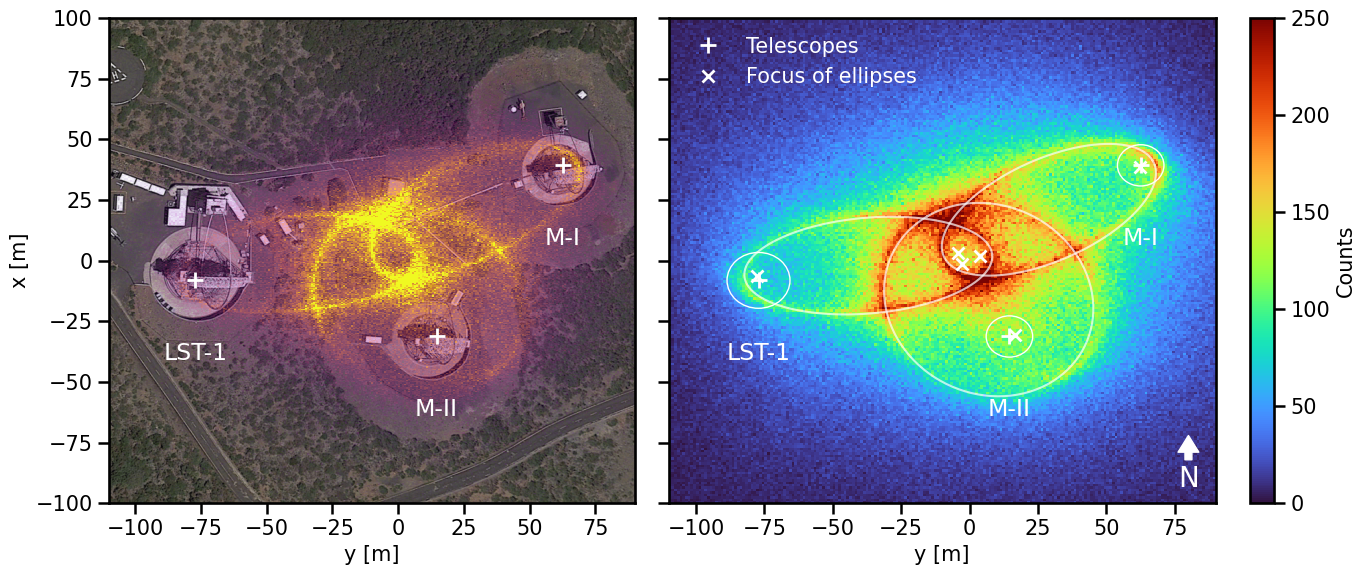

In [31]:
xlims = (-110, 90)
ylims = (-100, 100)


fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1.3]}, sharey=True)

##########################################
# --- telescope positions and labels --- #
##########################################
for ax in [ax1, ax2]:
    ax.plot(xpos, ypos, '+', color='w', ms=12, label='Telescopes')
    for i in range(len(xpos)):
        ax.text(xpos[i], ypos[i]-30, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax1.add_patch(circleLST1)
ax1.add_patch(circleM1)
ax1.add_patch(circleM2)
##########################################

# plotting ellipses
u, v, a, b, t_rot = 7, -16, 41, 37, 2.15
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f1 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f1[0], f1[1], 'x', color='w', ms=8,)

u, v, a, b, t_rot = 29, 21, 43, 20.5, 0.49
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f2 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f2[0], f2[1], 'x', color='w', ms=8,)

u, v, a, b, t_rot = -37, -2, 45.5, 19.7, 0.101
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f3 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f3[0], f3[1], 'x', color='w', ms=8, label='Focus of ellipses',)

###############
# --- map --- #
ax2.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=1)
###############

#############################
# --- overlap histogram --- #
#############################
cmap = aux.transparent_cmap('plasma')

_, _, _, im = ax2.hist2d(xc3, yc3, bins=400, cmap=cmap, range=([-150, 150], [-105, 100]), vmax=90)
# fig.colorbar(im, ax=ax2, label='counts')
#############################


#####################
# --- histogram --- #
#####################
_, _, _, im = ax1.hist2d(xc3, yc3, bins=200, range=[xlims, ylims], cmap='turbo', vmax=250)
fig.colorbar(im, ax=ax1, label='Counts')
#####################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax1.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax1.transAxes, **kw, **kw_txt)
ax1.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax1.transAxes, **kw_txt)
#######################

ax1.legend(loc=2, frameon=False, labelcolor='w')

for ax in [ax1, ax2]:
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)
    ax.set_xlabel('y [m]')
ax2.set_ylabel('x [m]')

fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()

plt.savefig(f'{pltpath}reconstructed-positions-artifact.png', bbox_inches='tight', dpi=dpi)
plt.show()

stereo 3-Tel, 3041633 events


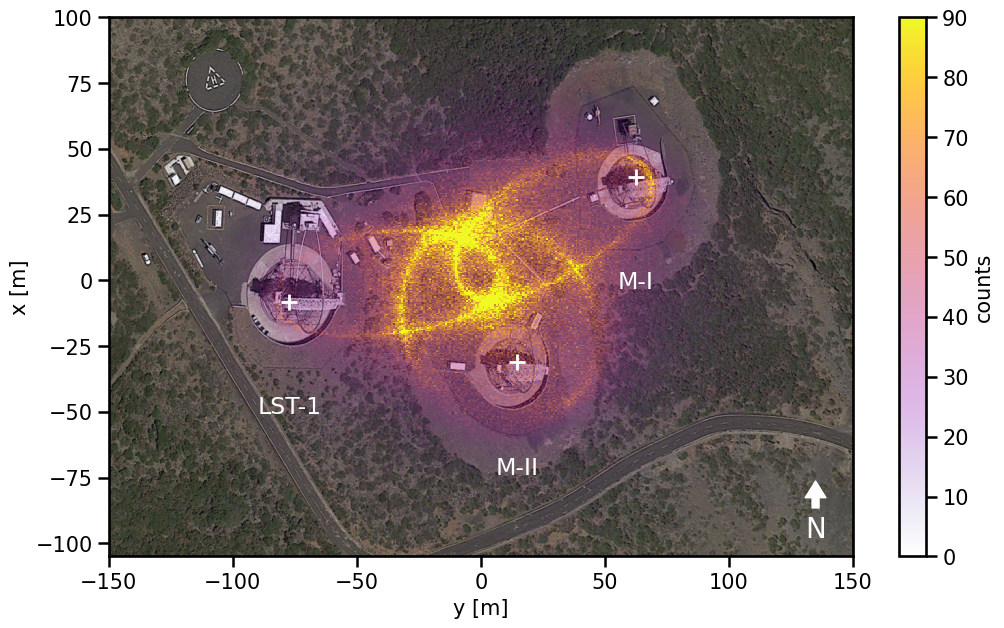

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
print(f'stereo 3-Tel, {len(yc3)} events')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=12)
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-40, tel_lab[i], c='w', fontsize=17, **kw_txt)
##########################################

###############
# --- map --- #
ax.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=1)
###############

#############################
# --- overlap histogram --- #
#############################
cmap = aux.transparent_cmap('plasma')

_, _, _, im = ax.hist2d(xc3, yc3, bins=400, cmap=cmap, range=([-150, 150], [-105, 100]), vmax=90)
fig.colorbar(im, label='counts')
#############################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

ax.set_xlim(*[-150, 150])
ax.set_ylim(*[-105, 100])
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

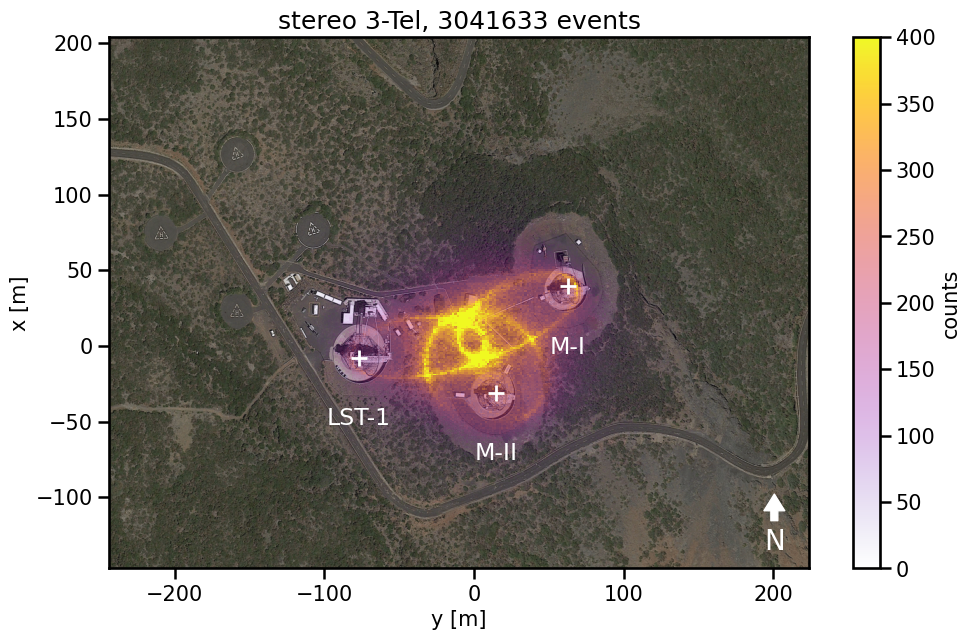

In [7]:
fig, ax = plt.subplots(figsize=(map_xsize, map_ysize))
ax.set_title(f'stereo 3-Tel, {len(yc3)} events')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=12)
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-40, tel_lab[i], c='w', fontsize=17, **kw_txt)
##########################################

###############
# --- map --- #
ax.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=1)
###############

#############################
# --- overlap histogram --- #
#############################
cmap = aux.transparent_cmap('plasma')

_, _, _, im = ax.hist2d(xc3, yc3, bins=300, cmap=cmap, range=(map_xlims, map_ylims), vmax=400)
fig.colorbar(im, label='counts')
#############################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

### Representing `energy`

In [ ]:
##################################
# --- binning representation --- #
##################################
Nbins = 100
bins_x = np.linspace(*map_xlims, Nbins)
bins_y = np.linspace(*map_ylims, Nbins)

bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

c3['bin_x'] = pd.cut(c3['core_x'], bins=bins_y, include_lowest=True)
c3['bin_y'] = pd.cut(c3['core_y'], bins=bins_x, include_lowest=True)

binned = c3.groupby(['bin_x', 'bin_y'])['reco_energy'].mean().unstack()
##################################

fig, ax = plt.subplots(figsize=(12,6.5))
ax.set_title(f'All events 3-Tel stereo')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=12)
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-50, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax.add_patch(circleLST1)
ax.add_patch(circleM1)
ax.add_patch(circleM2)
##########################################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

############################
# --- plotting the bin --- #
############################
cmesh1 = ax.pcolormesh(bins_x_center, bins_y_center, binned, cmap='jet', norm=colors.LogNorm())
fig.colorbar(cmesh1, ax=ax, label='energy [TeV]')
############################

ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

## Representing gammaness

In [ ]:
##################################
# --- binning representation --- #
##################################
Nbins = 100
bins_x = np.linspace(*map_xlims, Nbins)
bins_y = np.linspace(*map_ylims, Nbins)

bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

c3['bin_x'] = pd.cut(c3['core_x'], bins=bins_y, include_lowest=True)
c3['bin_y'] = pd.cut(c3['core_y'], bins=bins_x, include_lowest=True)

binned = c3.groupby(['bin_x', 'bin_y'])['gammaness'].mean().unstack()
##################################

fig, ax = plt.subplots(figsize=(12,6.5))
ax.set_title(f'All events 3-Tel stereo')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=10)
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-50, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax.add_patch(circleLST1)
ax.add_patch(circleM1)
ax.add_patch(circleM2)
##########################################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

############################
# --- plotting the bin --- #
############################
cmesh1 = ax.pcolormesh(bins_x_center, bins_y_center, binned, cmap='jet',)# norm=colors.LogNorm())
fig.colorbar(cmesh1, ax=ax, label='gammaness')
############################

ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

### Representing `impact_parameter`

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5.2), sharey=True, 
                                    gridspec_kw={'width_ratios': [1,1,1.2]})
ax1.set_title('LST-1 reconstructed impact par')
ax2.set_title('M1 reconstructed impact par')
ax3.set_title('M2 reconstructed impact par')

##########################################
# --- telescope positions and labels --- #
##########################################
for ax in [ax1, ax2, ax3]:
    ax.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=0.85)
    for i in range(len(xpos)):
        ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
##########################################

########################
# --- scatter plot --- #
########################
sc = ax1.scatter(xq, yq, c=iq1, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm())
sc = ax2.scatter(xq, yq, c=iq2, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm())
sc = ax3.scatter(xq, yq, c=iq3, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm())
fig.colorbar(sc, label='impact parameter', ax=ax3)
########################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax3.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax3.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################


for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

### Other `non-3T` telescope event distributions

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
ax1.set_title('M1 & M2')
ax2.set_title('M1 & LST-1')
ax3.set_title('M2 & LST-1')

##########################################
# --- telescope positions and labels --- #
##########################################
for ax in [ax1, ax2, ax3]:
    ax.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=0.85)
    for i in range(len(xpos)):
        ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
##########################################

########################
# --- scatter plot --- #
########################
ax1.scatter(xc0[:100000], yc0[:100000], c='c', marker='o', alpha=0.15, s=2, )
ax2.scatter(xc1[:100000], yc1[:100000], c='crimson',         marker='o', alpha=0.15, s=2, )
ax3.scatter(xc2[:100000], yc2[:100000], c='darkblue',         marker='o', alpha=0.1, s=2, )
########################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .18, .08, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax3.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax3.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*[-110, 100])
    ax.set_ylim(*[-75, 100])
    ax.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

### All events  `3-T` total plot

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title(f'All 3-Tel stereo ({len(yc3)} events)')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=12)
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-30, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax.add_patch(circleLST1)
ax.add_patch(circleM1)
ax.add_patch(circleM2)
##########################################

#####################
# --- histogram --- #
#####################
_, _, _, im = ax.hist2d(xc3, yc3, bins=200, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts')
#####################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

### All events  `3-T` total plot; ellipse geometry

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title(f'All 3-Tel stereo ({len(yc3)} events)')

##########################################
# --- telescope positions and labels --- #
##########################################
ax.plot(xpos, ypos, '+', color='w', ms=12, label='telescopes')
for i in range(len(xpos)):
    ax.text(xpos[i], ypos[i]-30, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax.add_patch(circleLST1)
ax.add_patch(circleM1)
ax.add_patch(circleM2)
##########################################

# plotting ellipses
u, v, a, b, t_rot = 7, -16, 41, 37, 2.15
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f1 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f1[0], f1[1], 'x', color='w', ms=8)

u, v, a, b, t_rot = 29, 21, 43, 20.5, 0.49
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f2 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f2[0], f2[1], 'x', color='w', ms=8)

u, v, a, b, t_rot = -37, -2, 45.5, 19.7, 0.101
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f3 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f3[0], f3[1], 'x', color='w', ms=8, label='focus of ellipses')


#####################
# --- histogram --- #
#####################
_, _, _, im = ax.hist2d(xc3, yc3, bins=200, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts')
#####################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

ax.legend(loc=2, frameon=False, labelcolor='w')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

# Showing error in impact parameter and direction distributions

In [ ]:
# --- binning the data in positions --- #
ylim  = (-110, 110)
xlim  = (-90,   90)

Nbins = 80
bins_x = np.linspace(*xlim, Nbins)
bins_y = np.linspace(*ylim, Nbins)
bins   = (bins_x, bins_y)
bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

core_set   = [df['core_x'], df['core_y']]

binned_1  = binned_statistic_2d(*core_set, df[f'impact'], bins=bins)[0].T
binned_2  = binned_statistic_2d(*core_set, df[f'error_recal_impact'], bins=bins)[0].T


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# plot the binned data
cmesh = ax1.pcolormesh(bins_x_center, bins_y_center, binned_1, cmap='jet')
fig.colorbar(cmesh, ax=ax1, label=f'zd [deg]')

absmax = np.max([np.abs(np.nanmin(binned_2)), np.nanmax(binned_2)])
cmesh = ax2.pcolormesh(bins_x_center, bins_y_center, binned_2, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax2, label='error impact')

for ax, t, c in zip([ax1, ax2],  ['Impact parameter', 'Error in reco. impact'], ['w', 'k']):
    ax.set_title(t)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.plot(xpos, ypos, ls='', c=c, marker='+', ms=15, lw=20) 
    
ax1.set_xlabel('y [m]')
ax2.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

In [ ]:
# --- binning the data in positions --- #
ylim  = (-110, 110)
xlim  = (-90,   90)

Nbins = 80
bins_x = np.linspace(*xlim, Nbins)
bins_y = np.linspace(*ylim, Nbins)
bins   = (bins_x, bins_y)
bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

core_set   = [df['core_x'], df['core_y']]

binned_zd  = binned_statistic_2d(*core_set, df[f'zd'], bins=bins)[0].T
binned_az  = binned_statistic_2d(*core_set, df[f'az'], bins=bins)[0].T


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# plot the binned data
cmesh = ax1.pcolormesh(bins_x_center, bins_y_center, binned_zd, cmap='plasma')
fig.colorbar(cmesh, ax=ax1, label=f'zd [deg]')
cmesh = ax2.pcolormesh(bins_x_center, bins_y_center, binned_az, cmap='plasma')
fig.colorbar(cmesh, ax=ax2, label=f'az [deg]')

for ax, t in zip([ax1, ax2],  ['zd(x, y)', 'az(x, y)']):
    ax.set_title(t)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.plot(xpos, ypos, ls='', c='w', marker='+', ms=15, lw=20) 
    
ax1.set_xlabel('y [m]')
ax2.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

In [ ]:
# --- binning the data in positions --- #
ylim  = (-110, 110)
xlim  = (-90,   90)

Nbins = 80
bins_x = np.linspace(*xlim, Nbins)
bins_y = np.linspace(*ylim, Nbins)
bins   = (bins_x, bins_y)
bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

core_set   = [df['core_x'], df['core_y']]

binned_1  = binned_statistic_2d(*core_set, df[f'psi'], bins=bins)[0].T
binned_2  = binned_statistic_2d(*core_set, c3_2[f'psi'], bins=bins)[0].T
binned_3  = binned_statistic_2d(*core_set, c3_3[f'psi'], bins=bins)[0].T


fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('psi parameter')

# plot the binned data
absmax = np.max([np.abs(np.nanmin(binned_1)), np.nanmax(binned_1)])
cmesh = ax1.pcolormesh(bins_x_center, bins_y_center, binned_1, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax1, label='psi [deg]')

absmax = np.max([np.abs(np.nanmin(binned_2)), np.nanmax(binned_2)])
cmesh = ax2.pcolormesh(bins_x_center, bins_y_center, binned_2, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax2, label='psi [deg]')

absmax = np.max([np.abs(np.nanmin(binned_3)), np.nanmax(binned_3)])
cmesh = ax3.pcolormesh(bins_x_center, bins_y_center, binned_3, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax3, label='psi [deg]')

for ax, t in zip([ax1, ax2, ax3],  ['LST-1', 'M-1', 'M-2']):
    ax.set_title(t)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.plot(xpos, ypos, ls='', c='k', marker='+', ms=15, lw=20) 
    
ax3.set_xlabel('y [m]')
ax2.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
fig.delaxes(ax4)

fig.tight_layout()
plt.show()

In [ ]:
# --- binning the data in positions --- #
ylim  = (-110, 110)
xlim  = (-90,   90)

Nbins = 80
bins_x = np.linspace(*xlim, Nbins)
bins_y = np.linspace(*ylim, Nbins)
bins   = (bins_x, bins_y)
bins_x_center = (bins_x[:-1] + bins_x[1:]) / 2
bins_y_center = (bins_y[:-1] + bins_y[1:]) / 2

core_set   = [df['core_x'], df['core_y']]

binned_1  = binned_statistic_2d(*core_set, df[f'phi'], bins=bins)[0].T
binned_2  = binned_statistic_2d(*core_set, c3_2[f'phi'], bins=bins)[0].T
binned_3  = binned_statistic_2d(*core_set, c3_3[f'phi'], bins=bins)[0].T


fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('phi parameter')

# plot the binned data
absmax = np.max([np.abs(np.nanmin(binned_1)), np.nanmax(binned_1)])
cmesh = ax1.pcolormesh(bins_x_center, bins_y_center, binned_1, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax1, label='phi [deg]')

absmax = np.max([np.abs(np.nanmin(binned_2)), np.nanmax(binned_2)])
cmesh = ax2.pcolormesh(bins_x_center, bins_y_center, binned_2, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax2, label='phi [deg]')

absmax = np.max([np.abs(np.nanmin(binned_3)), np.nanmax(binned_3)])
cmesh = ax3.pcolormesh(bins_x_center, bins_y_center, binned_3, cmap='bwr', vmax=absmax, vmin=-absmax)
fig.colorbar(cmesh, ax=ax3, label='phi [deg]')

for ax, t in zip([ax1, ax2, ax3],  ['LST-1', 'M-1', 'M-2']):
    ax.set_title(t)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.plot(xpos, ypos, ls='', c='k', marker='+', ms=15, lw=20) 
    
ax3.set_xlabel('y [m]')
ax2.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
fig.delaxes(ax4)

fig.tight_layout()
plt.show()

### - Filtering by `h_max`

In [ ]:
bins = np.linspace(-500, 22000, 200)
index = np.where((bins > h_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, h_max<{h_lim} ({len(h_low)} events, {len(h_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(h_low['core_x'], h_low['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['h_max'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['h_max'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('h_max [m]')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, h-_max>{h_lim} ({len(h_up)} events, {len(h_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(h_up['core_x'], h_up['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['h_max'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['h_max'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('h_max [m]')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `|slope|`

In [ ]:
# binning
bins  = np.linspace(-40, 50, 200)
index1, index2 = np.where((bins > -slope_lim) == True)[0][0], np.where((bins > slope_lim) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, |slope|<{slope_lim} ({len(slope_low)} events, {len(slope_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(slope_low['core_x'], slope_low['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['slope'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['slope'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('slope')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, |slope|>{slope_lim} ({len(slope_up)} events, {len(slope_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(slope_up['core_x'], slope_up['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['slope'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['slope'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')
plt.hist(c3['slope'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('slope')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `gammaness`

In [ ]:
# binning
bins = np.linspace(0, 1, 200)
index1, index2 = np.where((bins > g_lim1) == True)[0][0], np.where((bins > g_lim2) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $\gamma<{g_lim1}$ ({len(gamma_low)} events, {len(gamma_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_low['core_x'], gamma_low['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax2.set_yscale('log')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, ${g_lim1}>\gamma>{g_lim2}$ ({len(gamma_mid)} events, {len(gamma_mid)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_mid['core_x'], gamma_mid['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax2.set_yscale('log')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $\gamma>{g_lim2}$ ({len(gamma_up)} events, {len(gamma_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_up['core_x'], gamma_up['core_y'], 
                         bins=70, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax2.set_yscale('log')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `gammaness_var`

In [ ]:
# binning
bins = np.linspace(0, 0.25, 200)
index = np.where((bins > gv_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, gammaness_var<{gv_lim} ({len(gv_low)} events, {len(gv_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gv_low['core_x'], gv_low['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness_var'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax2.set_yscale('log')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('gammaness_var')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, gammaness_var>{gv_lim} ({len(gv_up)} events, {len(gv_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gv_up['core_x'], gv_up['core_y'], bins=100, range=[xlims, ylims], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness_var'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax2.set_yscale('log')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('gammaness_var')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `intensity`

In [ ]:
# binning
bins = np.logspace(1.5, 7, 200)
index = np.where((bins > i_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, intensity<{i_lim} ({len(i_low)} events, {len(i_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(i_low['core_x'], i_low['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['intensity'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['intensity'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax2.loglog()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('h_max [m]')
ax2.set_ylabel('intensity')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, intensity>{i_lim} ({len(i_up)} events, {len(i_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(i_up['core_x'], i_up['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['intensity'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['intensity'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax2.loglog()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('intensity')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `reco_energy`

In [ ]:
# binning
bins = np.logspace(-2, 2.5, 200)
index1, index2 = np.where((bins > e_lim1) == True)[0][0], np.where((bins > e_lim2) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $E>{e_lim2}$ TeV ({len(e_up)} events, {len(e_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_up['core_x'], e_up['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax2.loglog()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, ${e_lim1}>E>{e_lim2}$ TeV ({len(e_mid)} events, {len(e_mid)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_mid['core_x'], e_mid['core_y'], 
                         bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax2.loglog()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $E<{e_lim1}$ TeV ({len(e_low)} events, {len(e_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_low['core_x'], e_low['core_y'], 
                         bins=50, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')

ax2.loglog()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `reco_energy_var`

In [ ]:
# binning
bins = np.linspace(0, 1, 200)
index = np.where((bins > ev_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, reco_energy_var<{ev_lim} ({len(ev_low)} events, {len(ev_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(ev_low['core_x'], ev_low['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy_var'], bins=bins[:index], histtype='stepfilled', color='darkviolet')


ax2.set_yscale('log')
fig.tight_layout()
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('energy_var')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, reco_energy_var>{ev_lim} ({len(ev_up)} events, {len(ev_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(ev_up['core_x'], ev_up['core_y'], bins=100, range=[xlims, ylims], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy_var'], bins=bins[index:], histtype='stepfilled', color='darkviolet')


ax2.set_yscale('log')
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('energy_var')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `disp_diff_mean`

In [ ]:
# binning
bins = np.linspace(0, 2.5, 200)
index = np.where((bins > d_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, disp diff<{d_lim:.1f} ({len(d_low)} events, {len(d_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(d_low['core_x'], d_low['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['disp_diff_mean'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['disp_diff_mean'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('disp_diff_mean')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, disp diff>{d_lim:.1f} ({len(d_up)} events, {len(d_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(d_up['core_x'], d_up['core_y'], bins=100, range=[xlims, ylims], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['disp_diff_mean'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['disp_diff_mean'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('disp_diff_mean')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `length`

In [ ]:
# binning
bins = np.linspace(0, 0.6, 200)
index = np.where((bins > len_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, lenght<{len_lim} ({len(len_low)} events, {len(len_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(len_low['core_x'], len_low['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['length'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['length'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax2.set_yscale('log')
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('length')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, lenght>{len_lim} ({len(len_up)} events, {len(len_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(len_up['core_x'], len_up['core_y'], bins=100, range=[xlims, ylims], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['length'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['length'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax2.set_yscale('log')
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('length')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `width`

In [ ]:
# binning
bins = np.linspace(0, 0.45, 200)
index = np.where((bins > wi_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, width<{wi_lim} ({len(wi_low)} events, {len(wi_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(wi_low['core_x'], wi_low['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['width'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['width'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax2.set_yscale('log')
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('width')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, width>{wi_lim} ({len(wi_up)} events, {len(wi_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(wi_up['core_x'], wi_up['core_y'], bins=100, range=[xlims, ylims], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['width'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['width'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax2.set_yscale('log')
ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('width')
ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

## Filtering by `intensity`-`length` diagram

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5.5), sharey=True)
ax1.set_title(f'LST-1')
ax2.set_title(f'MAGIC-1')
ax3.set_title(f'MAGIC-2')

binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)
_, _, _, im = ax1.hist2d(np.log10(c3['intensity'].to_numpy()), 
                        (c3['length'].to_numpy()),
                        bins=bins, cmap='summer', norm=colors.LogNorm())
_, _, _, im = ax2.hist2d(np.log10(c3_2['intensity'].to_numpy()), 
                        (c3_2['length'].to_numpy()),
                        bins=bins, cmap='summer', norm=colors.LogNorm())
_, _, _, im = ax3.hist2d(np.log10(c3_3['intensity'].to_numpy()), 
                        (c3_3['length'].to_numpy()),
                        bins=bins, cmap='summer', norm=colors.LogNorm())
fig.colorbar(im, label='counts', ax=ax3)

ax1.set_ylabel('length')
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor((40/255, 125/255, 90/255))
    ax.set_xlabel('$\log $(intensity)')
fig.tight_layout()
plt.show()

In [ ]:
def parabola(logI, disp=1.9, slope=0.18, inter=0.02):
    return slope * (logI - disp) ** 2 + inter

df_copy = c3.copy()

df_copy['x'] = np.log10(df_copy['intensity'].to_numpy())
df_copy['y'] = df_copy['length'].to_numpy()

# Calculate the y values of the parabolic function for each x value
df_copy['parabola_x'] = parabola(df_copy['x'])

# Calculate the distance between each point in the dataset and the corresponding point on the parabolic line
df_copy['distance'] = np.abs(df_copy['y'] - df_copy['parabola_x'])

# Select the points within a certain distance from the parabolic line
threshold = 0.05
df_within = df_copy[df_copy['distance'] < threshold]

# Select the points outside a certain distance from the parabolic line
df_outside = df_copy[df_copy['distance'] >= threshold]

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title(f'LST-1 data {len(c3)} events')
binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)

_, _, _, im = ax.hist2d(np.log10(c3['intensity'].to_numpy()), c3['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())

ax.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
fig.colorbar(im, label='counts', ax=ax)
ax.set_ylabel('length')
ax.set_facecolor((40/255, 125/255, 90/255))
ax.set_xlabel('$\log $(intensity)')
plt.show()

In [ ]:
# binning
binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, ~Muons {len(df_within)/len(c3)*100:.1f}% events')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(df_within['core_x'], df_within['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

_, _, _, im = ax2.hist2d(np.log10(df_within['intensity'].to_numpy()), df_within['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())


ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\log$(intensity)')
ax2.set_ylabel('length')
ax2.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
ax2.set_facecolor((40/255, 125/255, 90/255))
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, ~Non-Muons {len(df_outside)/len(c3)*100:.1f}% events')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(df_outside['core_x'], df_outside['core_y'], bins=100, range=[xlims, ylims],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

_, _, _, im = ax2.hist2d(np.log10(df_outside['intensity'].to_numpy()), df_outside['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())

ax1.set_xlim(*xlims)
ax1.set_ylim(*ylims)
ax1.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\log$(intensity)')
ax2.set_ylabel('length')
ax2.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
ax2.set_facecolor((40/255, 125/255, 90/255))
fig.tight_layout()
plt.show()

## Showing MC gamma data

In [ ]:
filenames = glob.glob(dir_mask)
filenames.sort()
print(f'{len(filenames)} MC files found:\n')
for i,f in zip(range(len(filenames)),filenames):
    index1, index2 = f.find('/dl2_'), f.find(f'_LST-1_MAGIC_')
    f = f.replace('_', ' ')
    print(i, f'{f[index1+11:index2]}')

# --- pandas dataframes reading --- #
qmask = 'combo_type == 3 & tel_id == 1'
cols  = ['core_x', 'core_y', 'true_core_x', 'true_core_y', 'pointing_az']
data  = [pd.read_hdf(f, key='/events/parameters').query(qmask)[cols] for f in filenames]

In [ ]:
# --- plotting the data from MC --- #
for i in range(len(data)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.8), sharex=True, sharey=True)

    for ax in [ax1, ax2]:
        for j in range(len(xpos)):
            ax.plot(xpos[j], ypos[j], '+', color='w', ms=12)
            ax.text(xpos[j], ypos[j] - 28, tel_lab[j], c='w', ha='center', va='center', fontsize=12)

    histrange = [xlims, ylims]
    ax1.hist2d(data[i]['core_y'] * (-1), data[i]['core_x'], bins=150, range=histrange, cmap='plasma')
    ax2.hist2d(data[i]['true_core_y'] * (-1), data[i]['true_core_x'], bins=150, range=histrange, cmap='plasma')
    
    index_zd, index_LST = filenames[i].index('zd'), filenames[i].index('LST-1')
    ax1.set_title(filenames[i][index_zd:index_LST-1].replace('_', ' '))
    ax2.set_title(f'True positions')
    for ax in [ax1, ax2]:
        ax.set_xlim(*xlims)
        ax.set_ylim(*ylims)
        
        direc = - np.rad2deg(data[i]['pointing_az'].to_numpy()[0]) + 90
        ax.plot(*geom.line_in_direction(direc, [0, 0, 0], ax), '--', color='w', lw=2)
        
    #######################
    # --- north arrow --- #
    #######################
    xa, ya, arrow_length, kw = .95, .19, .09, dict(arrowprops=dict(facecolor='w', width=4, headwidth=10, ec='w'))
    ax2.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
    ax2.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
    #######################
    
    ax1.set_xlabel('x [m]')
    ax2.set_xlabel('x [m]')
    ax1.set_ylabel('y [m]')
    
    ax1.set_facecolor('r')
    fig.tight_layout()
    plt.show()